In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust = pd.read_csv('Churn.csv')
cust.head(3)

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921


In [3]:
cust.describe(include= 'all')

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333.000000,3333
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,3333
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,NaN,381-4756
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,1
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,...,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,NaN,437.182418,NaN
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,...,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,NaN,42.371290,NaN
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,NaN,408.000000,NaN
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,...,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,NaN,408.000000,NaN
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,...,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,NaN,415.000000,NaN
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,...,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,NaN,510.000000,NaN


In [4]:
cust.iloc[:, np.r_[10:12]].describe()

,DayCalls,DayCharge
count,3333.000000,3333.000000
mean,100.435644,30.562307
std,20.069084,9.259435
min,0.000000,0.000000
25%,87.000000,24.430000
50%,101.000000,30.500000
75%,114.000000,36.790000
max,165.000000,59.640000


In [5]:
cust['Total_callCharge'] = cust['DayCharge'] + cust['EveCharge'] + cust['NightCharge']

## Correlation of the features and target(Churn)

In [6]:
cust_num = cust.select_dtypes(include = 'number')

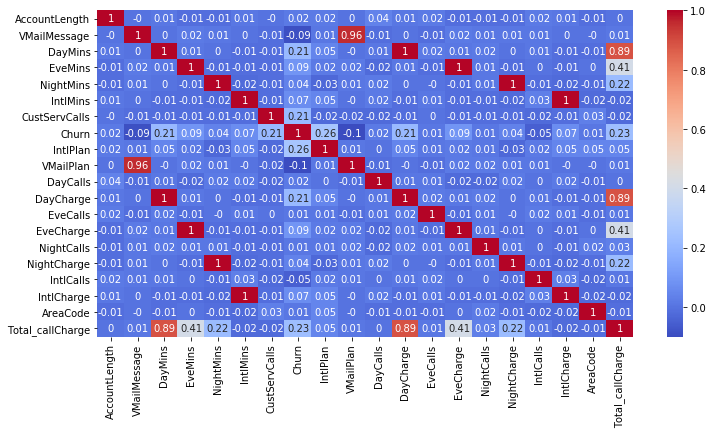

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(cust_num.corr().applymap(lambda x: np.round(x, 2)), cmap = 'coolwarm', annot = True)

## Correlation of the features with target(Churn)

In [8]:
cust_num.corr().applymap(lambda x: np.round(x, 2))['Churn']

AccountLength       0.02
VMailMessage       -0.09
DayMins             0.21
EveMins             0.09
NightMins           0.04
IntlMins            0.07
CustServCalls       0.21
Churn               1.00
IntlPlan            0.26
VMailPlan          -0.10
DayCalls            0.02
DayCharge           0.21
EveCalls            0.01
EveCharge           0.09
NightCalls          0.01
NightCharge         0.04
IntlCalls          -0.05
IntlCharge          0.07
AreaCode            0.01
Total_callCharge    0.23
Name: Churn, dtype: float64

## Relationship between DayCharge and Churn

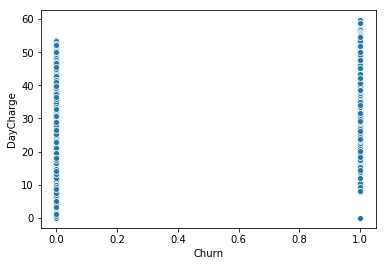

In [9]:
sns.scatterplot(y =cust['DayCharge'], x = cust['Churn'])

## Distribution of minutes spent on calls during the day by Churn(0,1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000265158F6A90>,
      dtype=object)

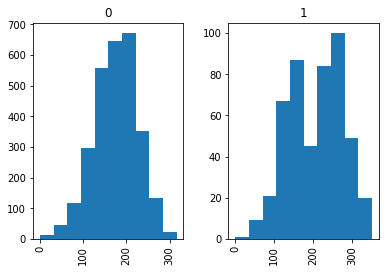

In [10]:
cust.hist(by = 'Churn', column= 'DayMins')

## Count of customers that churned and those that did not by VoiceMail Plan

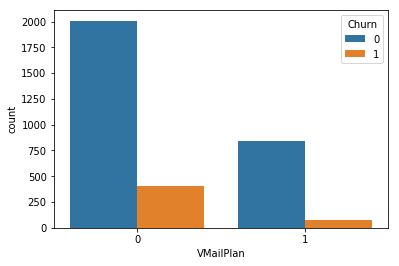

In [11]:
sns.countplot(cust['VMailPlan'], hue = cust['Churn'])

In [12]:
pd.crosstab(cust['VMailPlan'], cust['Churn'])

Churn,0,1
VMailPlan,,
0,2008,403
1,842,80


## Count of customers that churned and those that did not by International Plan

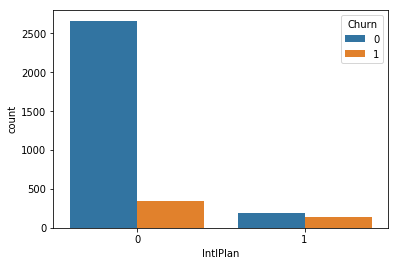

In [13]:
sns.countplot(cust['IntlPlan'], hue = cust['Churn'])

In [14]:
pd.crosstab(cust['IntlPlan'], cust['Churn'])

Churn,0,1
IntlPlan,,
0,2664,346
1,186,137


## Customer Service calls by Churn or not

In [15]:
pd.crosstab(cust['CustServCalls'], cust['Churn'])

Churn,0,1
CustServCalls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


## Count of customers churn by Area Code

In [16]:
pd.crosstab(cust['AreaCode'], cust['Churn'])

Churn,0,1
AreaCode,,
408,716,122
415,1419,236
510,715,125


## Relationship between Area Code and Total Call Charges

#### Ho: The total call charges for all Area Code is the same
#### Ha: The total call charges for the Area Codes are not equal
#### Significance Level 0.05

In [17]:
areacode_charges = cust[['AreaCode', 'Total_callCharge']]
areacode_charges.head(3)

,AreaCode,Total_callCharge
0,415,72.86
1,415,55.54
2,415,59.00


In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [19]:
model = ols('Total_callCharge ~ AreaCode', data = areacode_charges).fit()

In [20]:
anova_table = sm.stats.anova_lm(model, typ = 1)

In [21]:
print(anova_table)

              df         sum_sq     mean_sq         F   PR(>F)
AreaCode     1.0      18.384441   18.384441  0.167098  0.68273
Residual  3331.0  366482.572985  110.021787       NaN      NaN


#### since the pvalue(0.68) is greater than signnificance level 0.05, we fail to reject the null hypothesis(the charges between the area is the same.
#### We conclude there is no significance difference between the charges of the areas

## Proportion of churn in people with International plan and does without it

#### Ho: There is no statistically significance difference between the churn rate in people with Intl plan and those without it
#### Ha: There is statistically significance difference in churn rate in people with Intl plan and those without it
#### Significance level 0.05

In [22]:
intplan_churn = pd.crosstab(cust['IntlPlan'], cust['Churn'])
intplan_churn

Churn,0,1
IntlPlan,,
0,2664,346
1,186,137


In [23]:
from statsmodels.stats.proportion import proportions_ztest

In [24]:
proportion_stat, p_value = proportions_ztest([346, 137], [3010,323])

In [25]:
proportion_stat, p_value

(-15.001803255009364, 7.145140406313257e-51)

#### since the p_value is less than 0.05, we reject the null hypothesis (the proportion of churn in people with Intl plan is the same as people without intl plan).
#### We conclude there is a significant difference between the number of churn in people with Intl plan those without it

## Relationship between International Plan and Churn

#### Ho: International Plan does not affect churn
#### Ha: International Plan affects churn
#### Significance level 0.05

In [26]:
from scipy import stats

In [27]:
chi_statistic, p_value, dof, expected = stats.chi2_contingency(intplan_churn)

In [28]:
chi_statistic, p_value 

(222.5657566499376, 2.4931077033159556e-50)

In [29]:
print(intplan_churn)

Churn        0    1
IntlPlan           
0         2664  346
1          186  137


In [30]:
print(expected)

[[2573.80738074  436.19261926]
 [ 276.19261926   46.80738074]]


#### since p_value is less than 0.05, we reject the null hypothesis that  Intl plan has no effect on churn.
#### Therefore we conclude that IntlPlan has effect on churn

# Time spent on calls

#### Ho: The time spent on calls during the day, evening and night is the same
#### Ha: Time of the day has effect on minutes spent on calls
#### Significance level 0.05

In [31]:
cust['DayMins'].var(), cust['EveMins'].var(), cust['NightMins'].var()

(2966.696486522607, 2571.8940164454552, 2557.714001760915)

In [32]:
d = pd.DataFrame({'Time': 'DayMins', 'minutes' :np.array(cust['DayMins'])})
e = pd.DataFrame({'Time': 'EveMins', 'minutes' :np.array(cust['EveMins'])})
n = pd.DataFrame({'Time': 'NightMins', 'minutes' :np.array(cust['NightMins'])})
all_call_mins = pd.concat([d,e,n])

In [33]:
model = ols('minutes ~ Time', data = all_call_mins).fit()

In [34]:
anova_table = sm.stats.anova_lm(model, typ = 1)

In [35]:
print(anova_table)

              df        sum_sq        mean_sq           F        PR(>F)
Time         2.0  9.940731e+05  497036.538885  184.171632  2.842673e-79
Residual  9996.0  2.697689e+07    2698.768168         NaN           NaN


#### since the p_value is 2.842673e-79 is less than 0.05, we reject the null hypothesis and Conclude that there is statistically significant difference in the minutes spent on calls for morning, day and night.

# Prediction of customers churn

In [36]:
cust.drop('Phone', axis = 1, inplace = True)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
y = cust['Churn']
X = cust.drop('Churn', axis = 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
num_cols = cust.select_dtypes(include= 'number').drop('Churn', axis = 1).columns
num_cols

Index(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 'AreaCode', 'Total_callCharge'],
      dtype='object')

In [41]:
cat_cols = cust.select_dtypes(include= 'object').columns
cat_cols

Index(['State'], dtype='object')

In [42]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
num_transformer = Pipeline(steps = [('scaler',StandardScaler())])
cat_transformer = Pipeline(steps= [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                              ('cat', cat_transformer, cat_cols)])

In [44]:
model = GradientBoostingClassifier()

In [45]:
my_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                ('smt', SMOTE()),
                                ('model', model)])

In [46]:
my_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  Index(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', '...
                                        

In [47]:
pred = my_pipeline.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       940
           1       0.95      0.87      0.91       160

    accuracy                           0.97      1100
   macro avg       0.97      0.93      0.95      1100
weighted avg       0.97      0.97      0.97      1100



In [50]:
print(confusion_matrix(y_test, pred))

[[933   7]
 [ 21 139]]
